# ДЗ №1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

## 1. Определение функций, которые понадобятся для обучения

In [2]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [6]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

## 2. Подготовка тренировочных данных

In [7]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
print(iris_data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


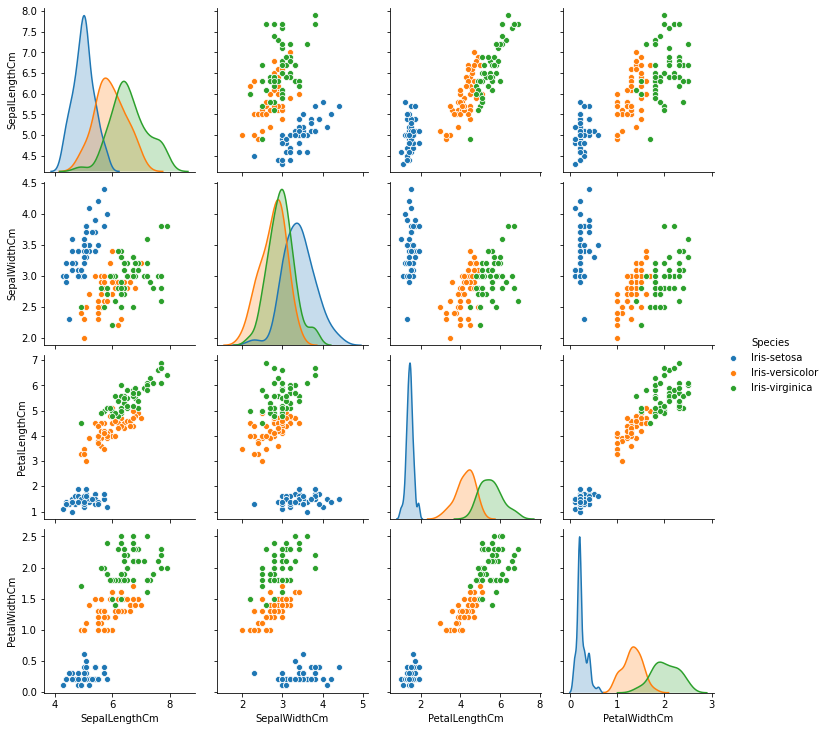

In [8]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

In [9]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())
x[1:10]

array([[0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [11]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)
y[1:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

## Шаг 3. Обученние нейронной сети

In [13]:
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода
w0, w1

(array([[-0.32477222, -0.88435966,  0.64439421,  0.76442867, -0.74651554],
        [ 0.07699801,  0.0283148 , -0.18097423,  0.90424252, -0.13779515],
        [-0.14111909,  0.50233856,  0.50196494,  0.36264867, -0.26564623],
        [-0.57886111, -0.35853045, -0.47377298,  0.91591197,  0.79867938]]),
 array([[-0.51796799,  0.6140673 ,  0.28745871],
        [ 0.72906805, -0.17837664, -0.96650618],
        [ 0.15143529, -0.34205885,  0.49393886],
        [ 0.12516781,  0.52909455,  0.59479122],
        [-0.2870241 , -0.11547842, -0.51528446]]))

In [14]:
# скорость обучения (learning rate)
n = 0.1

In [15]:
# массив для ошибок, чтобы потом построить график
errors = []

In [18]:
# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    if not((i+1) % 5000):
        print(f"epoсh: {i+1}")

epoсh: 5000
epoсh: 10000
epoсh: 15000
epoсh: 20000
epoсh: 25000
epoсh: 30000
epoсh: 35000
epoсh: 40000
epoсh: 45000


C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


epoсh: 50000
epoсh: 55000
epoсh: 60000
epoсh: 65000
epoсh: 70000
epoсh: 75000
epoсh: 80000
epoсh: 85000
epoсh: 90000
epoсh: 95000
epoсh: 100000


## Шаг 4. Демонстрация полученных результатов

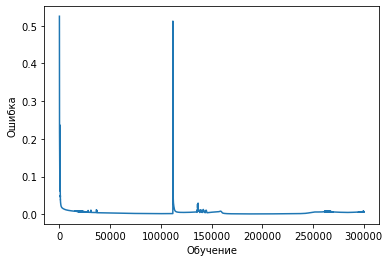

In [19]:
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

In [20]:
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Точность нейронной сети 99.39%


## Шаг 5. Подбор параметров

In [28]:
# процесс обучения
def two_layer_nn_learning(lr=0.1, epoch=100000, n_number=5):
    errors = []
    np.random.seed(1)
    w0 = 2*np.random.random((4, n_number)) - 1 # для входного слоя
    w1 = 2*np.random.random((n_number, 3)) - 1 # для внутреннего слоя
    
    for i in range(epoch):
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * lr
        w0 += layer0.T.dot(layer1_delta) * lr

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

        if not((i+1) % 5000):
            print(f"\tepoсh: {i+1}")
    
    return errors, accuracy, w0, w1

In [29]:
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning()

	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000


C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000


In [30]:
def two_layer_nn_predict(x, w0, w1):
    layer0 = x
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    return layer2

In [31]:
pr = two_layer_nn_predict(X_train, w0_tr, w1_tr)

C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [34]:
pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
print(f"mean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}\n")
pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
print(f"mean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n")

mean_absolute_error train:	0.014

mean_absolute_error test:	0.091



C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Шаг обучения: 1.0 Эпох: 5000 Нейронов: 4


C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


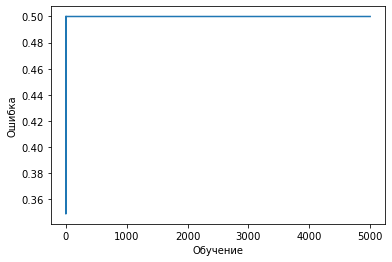

	Точность нейронной сети:	50.0%
	mean_absolute_error train:	0.500
	mean_absolute_error test:	0.500


Шаг обучения: 1.0 Эпох: 5000 Нейронов: 5


C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


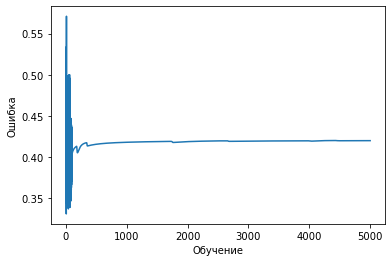

	Точность нейронной сети:	58.02%
	mean_absolute_error train:	0.420
	mean_absolute_error test:	0.430


Шаг обучения: 1.0 Эпох: 5000 Нейронов: 6


C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


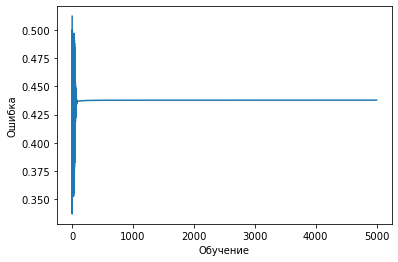

	Точность нейронной сети:	56.22%
	mean_absolute_error train:	0.438
	mean_absolute_error test:	0.450


Шаг обучения: 1.0 Эпох: 5000 Нейронов: 9


C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000


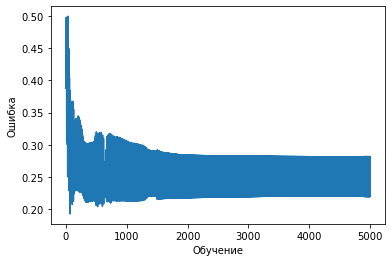

	Точность нейронной сети:	72.9%
	mean_absolute_error train:	0.222
	mean_absolute_error test:	0.274


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 4


C:\Users\glvv2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


	epoсh: 5000
	epoсh: 10000


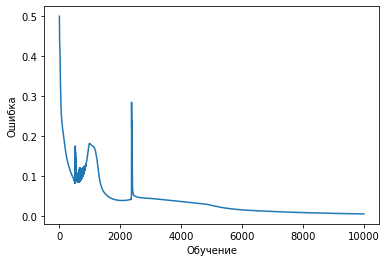

	Точность нейронной сети:	99.42%
	mean_absolute_error train:	0.006
	mean_absolute_error test:	0.075


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000


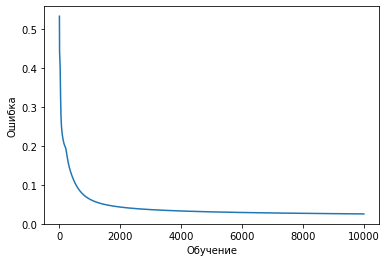

	Точность нейронной сети:	97.48%
	mean_absolute_error train:	0.025
	mean_absolute_error test:	0.102


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000


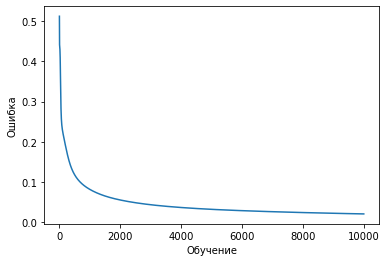

	Точность нейронной сети:	97.92%
	mean_absolute_error train:	0.021
	mean_absolute_error test:	0.071


Шаг обучения: 0.1 Эпох: 10000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000


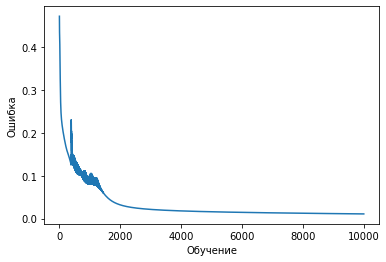

	Точность нейронной сети:	98.93%
	mean_absolute_error train:	0.011
	mean_absolute_error test:	0.090


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 4
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


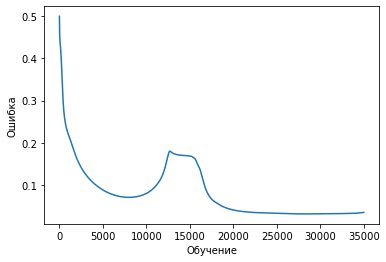

	Точность нейронной сети:	96.39%
	mean_absolute_error train:	0.036
	mean_absolute_error test:	0.105


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


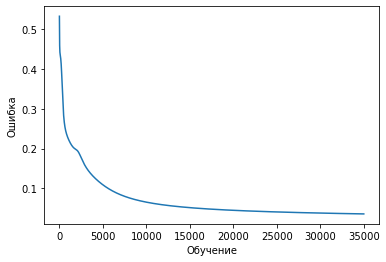

	Точность нейронной сети:	96.48%
	mean_absolute_error train:	0.035
	mean_absolute_error test:	0.100


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


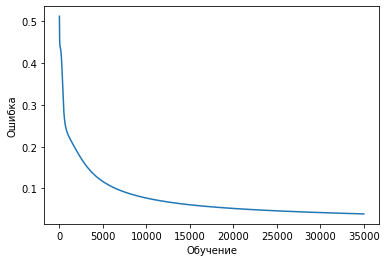

	Точность нейронной сети:	96.08%
	mean_absolute_error train:	0.039
	mean_absolute_error test:	0.078


Шаг обучения: 0.01 Эпох: 35000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000


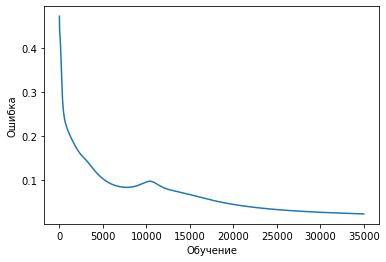

	Точность нейронной сети:	97.58%
	mean_absolute_error train:	0.024
	mean_absolute_error test:	0.098


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 4
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

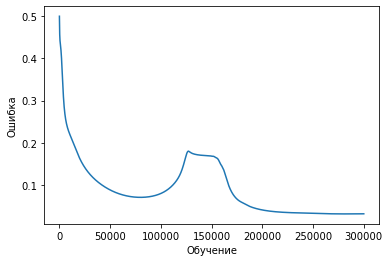

	Точность нейронной сети:	96.72%
	mean_absolute_error train:	0.033
	mean_absolute_error test:	0.085


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 5
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

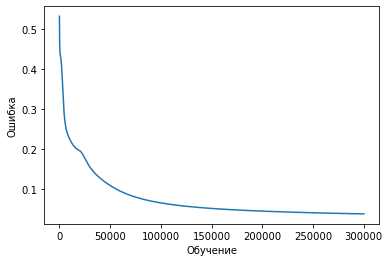

	Точность нейронной сети:	96.26%
	mean_absolute_error train:	0.037
	mean_absolute_error test:	0.100


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

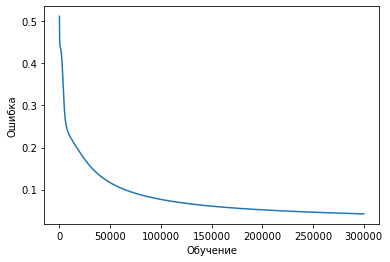

	Точность нейронной сети:	95.77%
	mean_absolute_error train:	0.042
	mean_absolute_error test:	0.079


Шаг обучения: 0.001 Эпох: 300000 Нейронов: 9
	epoсh: 5000
	epoсh: 10000
	epoсh: 15000
	epoсh: 20000
	epoсh: 25000
	epoсh: 30000
	epoсh: 35000
	epoсh: 40000
	epoсh: 45000
	epoсh: 50000
	epoсh: 55000
	epoсh: 60000
	epoсh: 65000
	epoсh: 70000
	epoсh: 75000
	epoсh: 80000
	epoсh: 85000
	epoсh: 90000
	epoсh: 95000
	epoсh: 100000
	epoсh: 105000
	epoсh: 110000
	epoсh: 115000
	epoсh: 120000
	epoсh: 125000
	epoсh: 130000
	epoсh: 135000
	epoсh: 140000
	epoсh: 145000
	epoсh: 150000
	epoсh: 155000
	epoсh: 160000
	epoсh: 165000
	epoсh: 170000
	epoсh: 175000
	epoсh: 180000
	epoсh: 185000
	epoсh: 190000
	epoсh: 195000
	epoсh: 200000
	epoсh: 205000
	epoсh: 210000
	epoсh: 215000
	epoсh: 220000
	epoсh: 225000
	epoсh: 230000
	epoсh: 235000
	epoсh: 240000
	epoсh: 245000
	epoсh: 250000
	epoсh: 255000
	epoсh: 260000
	epoсh: 265000
	epoсh: 270000
	epoсh: 275000
	epoсh: 280000
	epoсh: 285000
	epoсh: 290000
	ep

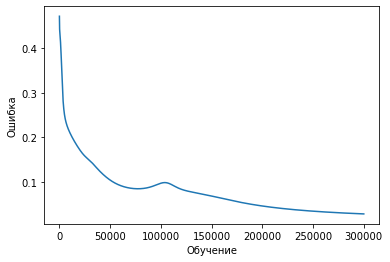

	Точность нейронной сети:	97.21%
	mean_absolute_error train:	0.028
	mean_absolute_error test:	0.098




In [37]:
iteration = 4
lrl = np.logspace(0, -3, iteration)
ep = [5000, 10000, 35000, 300000]
neuron_number = [4, 5, 6, 9]

for i in range(0, iteration):
    for n in neuron_number:
        print(f"Шаг обучения: {lrl[i]} Эпох: {ep[i]} Нейронов: {n}")
        errors = []
        errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning(lr=lrl[i], epoch=ep[i], n_number=n)
        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.show()

        print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
        pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
        print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
        pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
        print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

Шаг обучения: 0.1 Эпох: 10000 Нейронов: 6
	epoсh: 5000
	epoсh: 10000


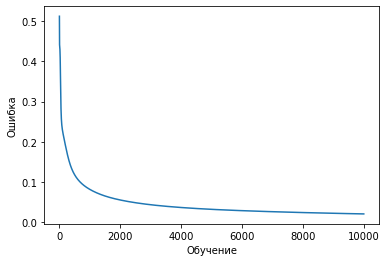

	Точность нейронной сети:	97.92%
	mean_absolute_error train:	0.021
	mean_absolute_error test:	0.071




In [39]:
print(f"Шаг обучения: 0.1 Эпох: 10000 Нейронов: 6")
errors = []
errors, accuracy, w0_tr, w1_tr = two_layer_nn_learning(lr=0.1, epoch=10000, n_number=6)
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

print("\tТочность нейронной сети:\t" + str(round(accuracy,2)) + "%")
pr_tr = two_layer_nn_predict(X_train, w0_tr, w1_tr)
print(f"\tmean_absolute_error train:\t{mean_absolute_error(y_train, pr_tr):.3f}")
pr_ts = two_layer_nn_predict(X_test, w0_tr, w1_tr)
print(f"\tmean_absolute_error test:\t{mean_absolute_error(y_test, pr_ts):.3f}\n\n")

## Выводы

Варьирование шага обучения и количества эпох показывает, что при уменьшении шага замедляется достижение минимума функции ошибки. Уменьшение шага ниже 0.1 не позволяет добиться значительного прироста точности. Проверка на test выборке не показывает значительного переобучения.

Параметры: шаг обучения 0.1 количество эпох 10000 позволяют добиться достижимой точности (скрытый слой 6 нейронов) и уменьшить количество итераций.